# Q 3Prepare a prediction model for profit of 50_startups data. #Do transformations for getting better predictions of profit and #make a table containing R^2 value .

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Pritee\OneDrive\Documents\data science assignments\assignments\multi linear regression\50_Startups.csv", encoding='latin1')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
# Check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
#Data visualization

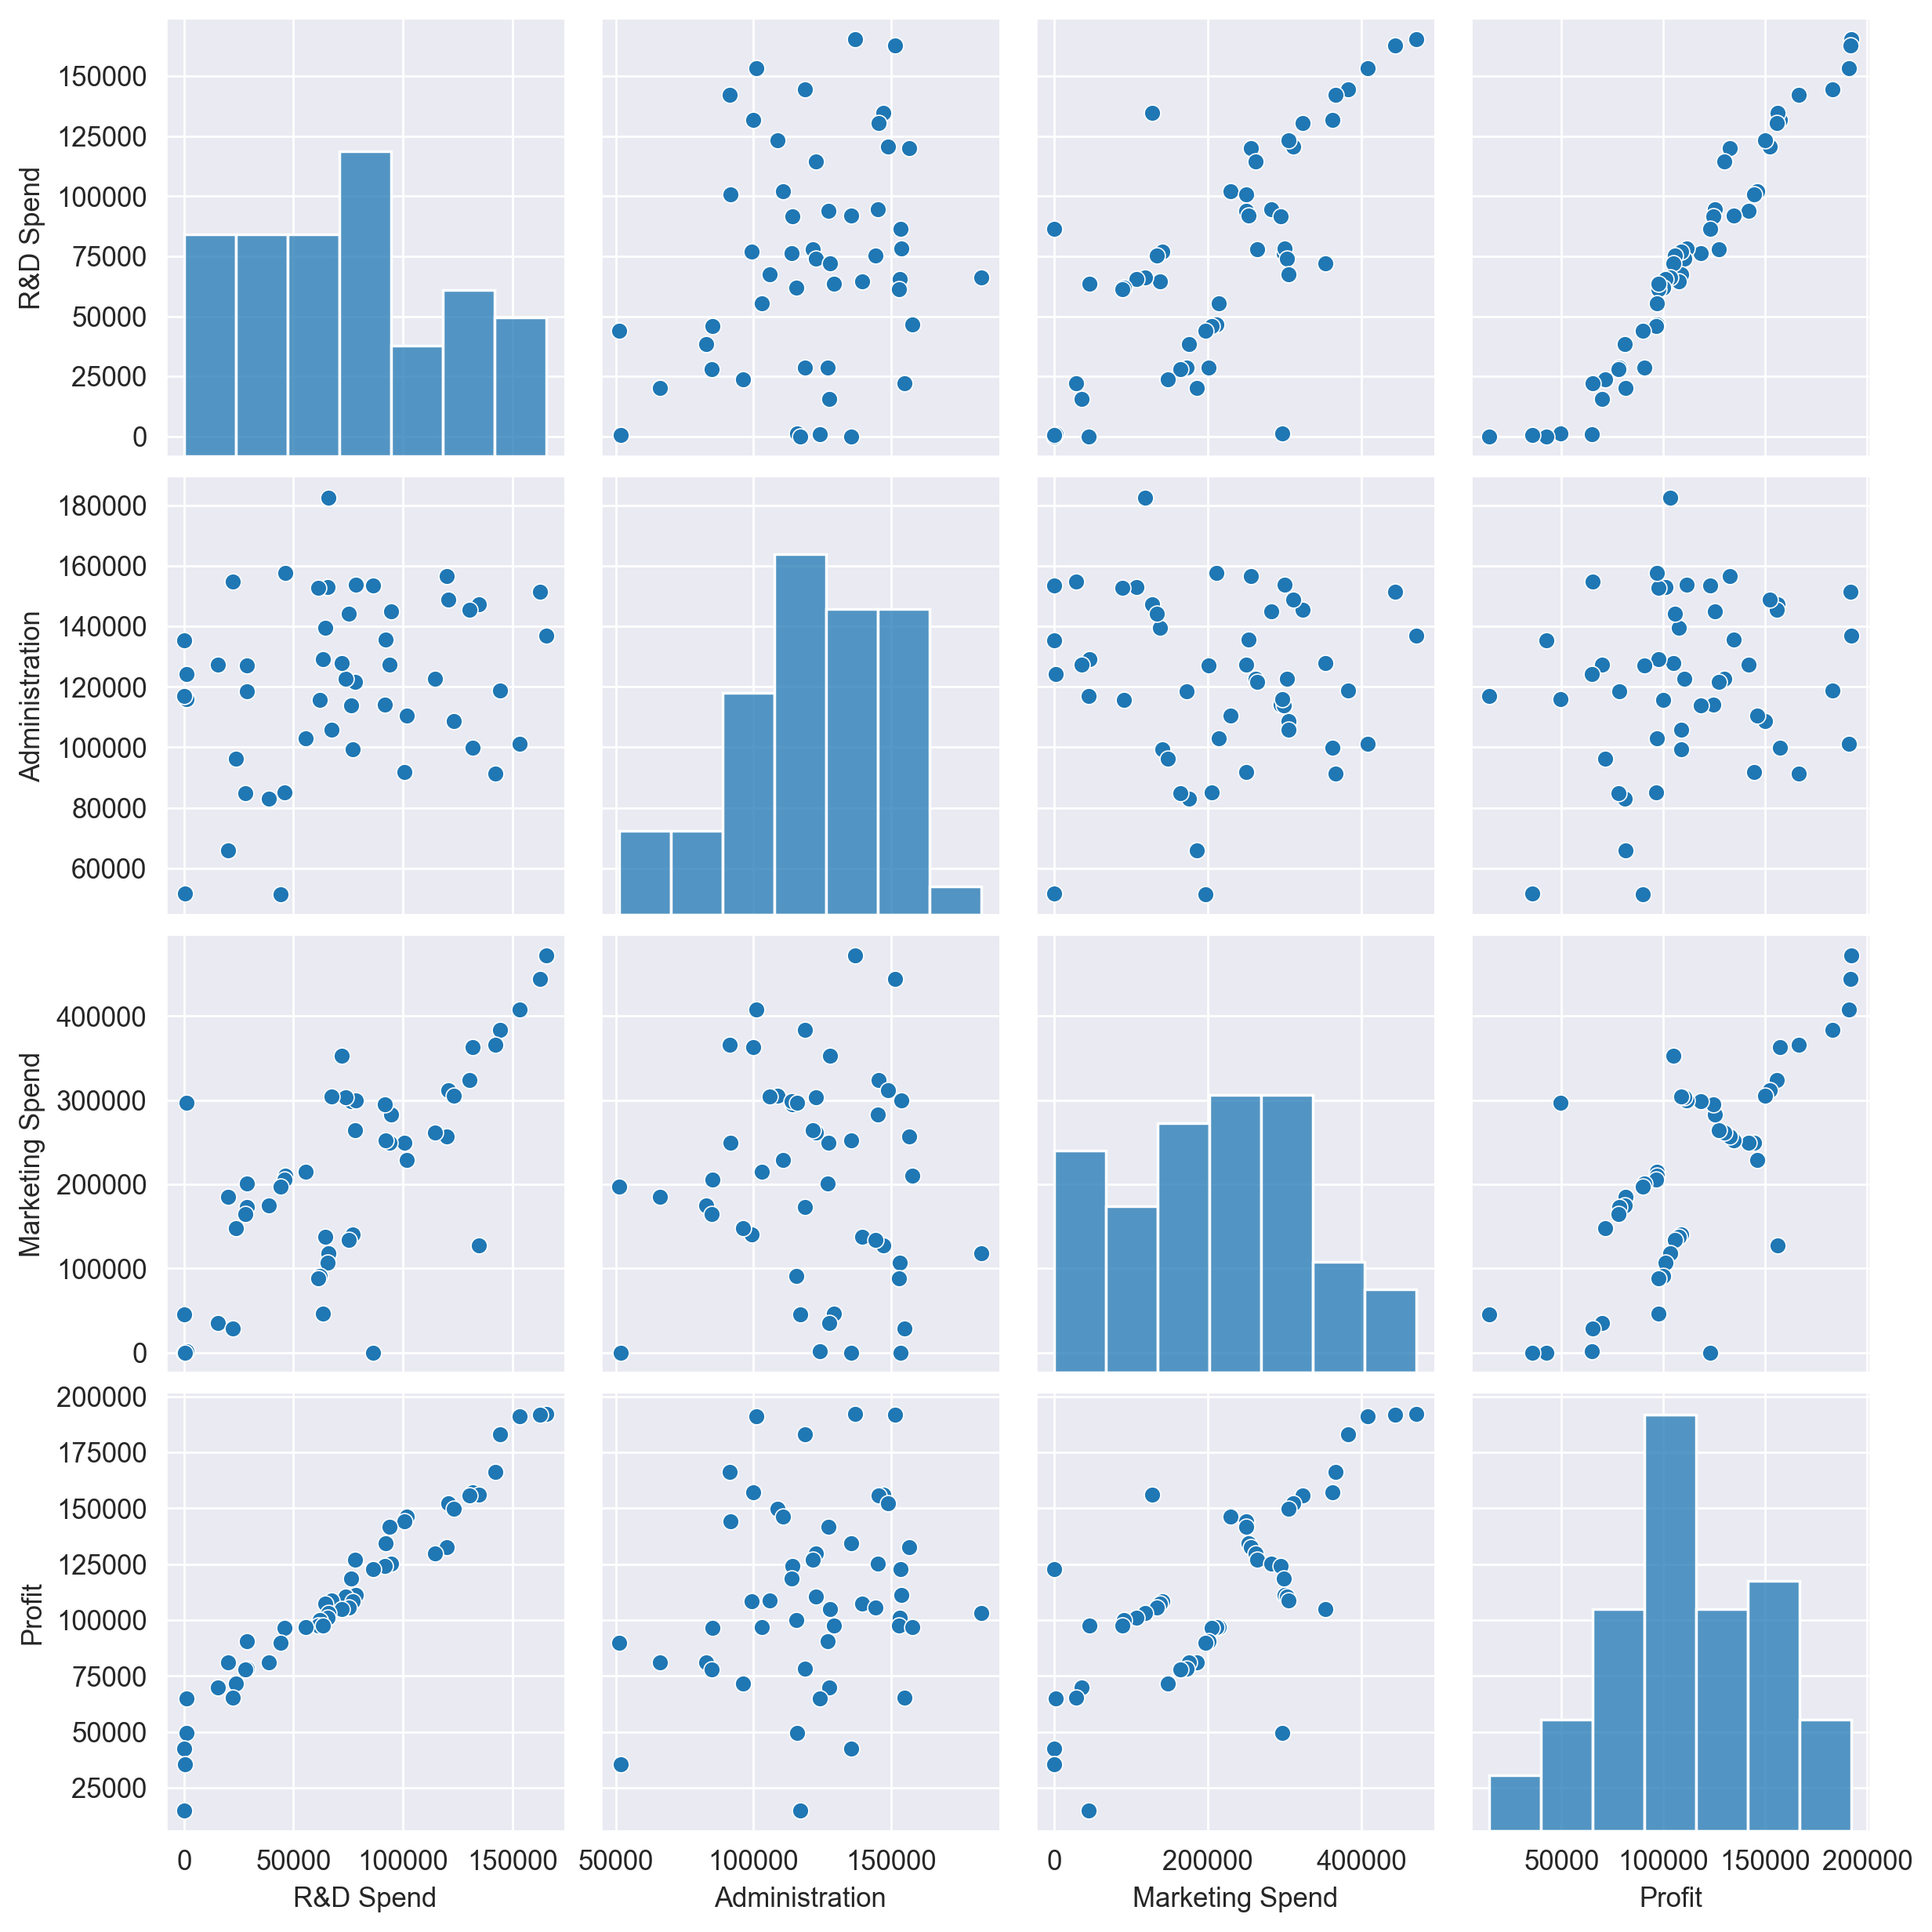

In [6]:
sns.pairplot(df)

In [ ]:
#Correlation

<Axes: >

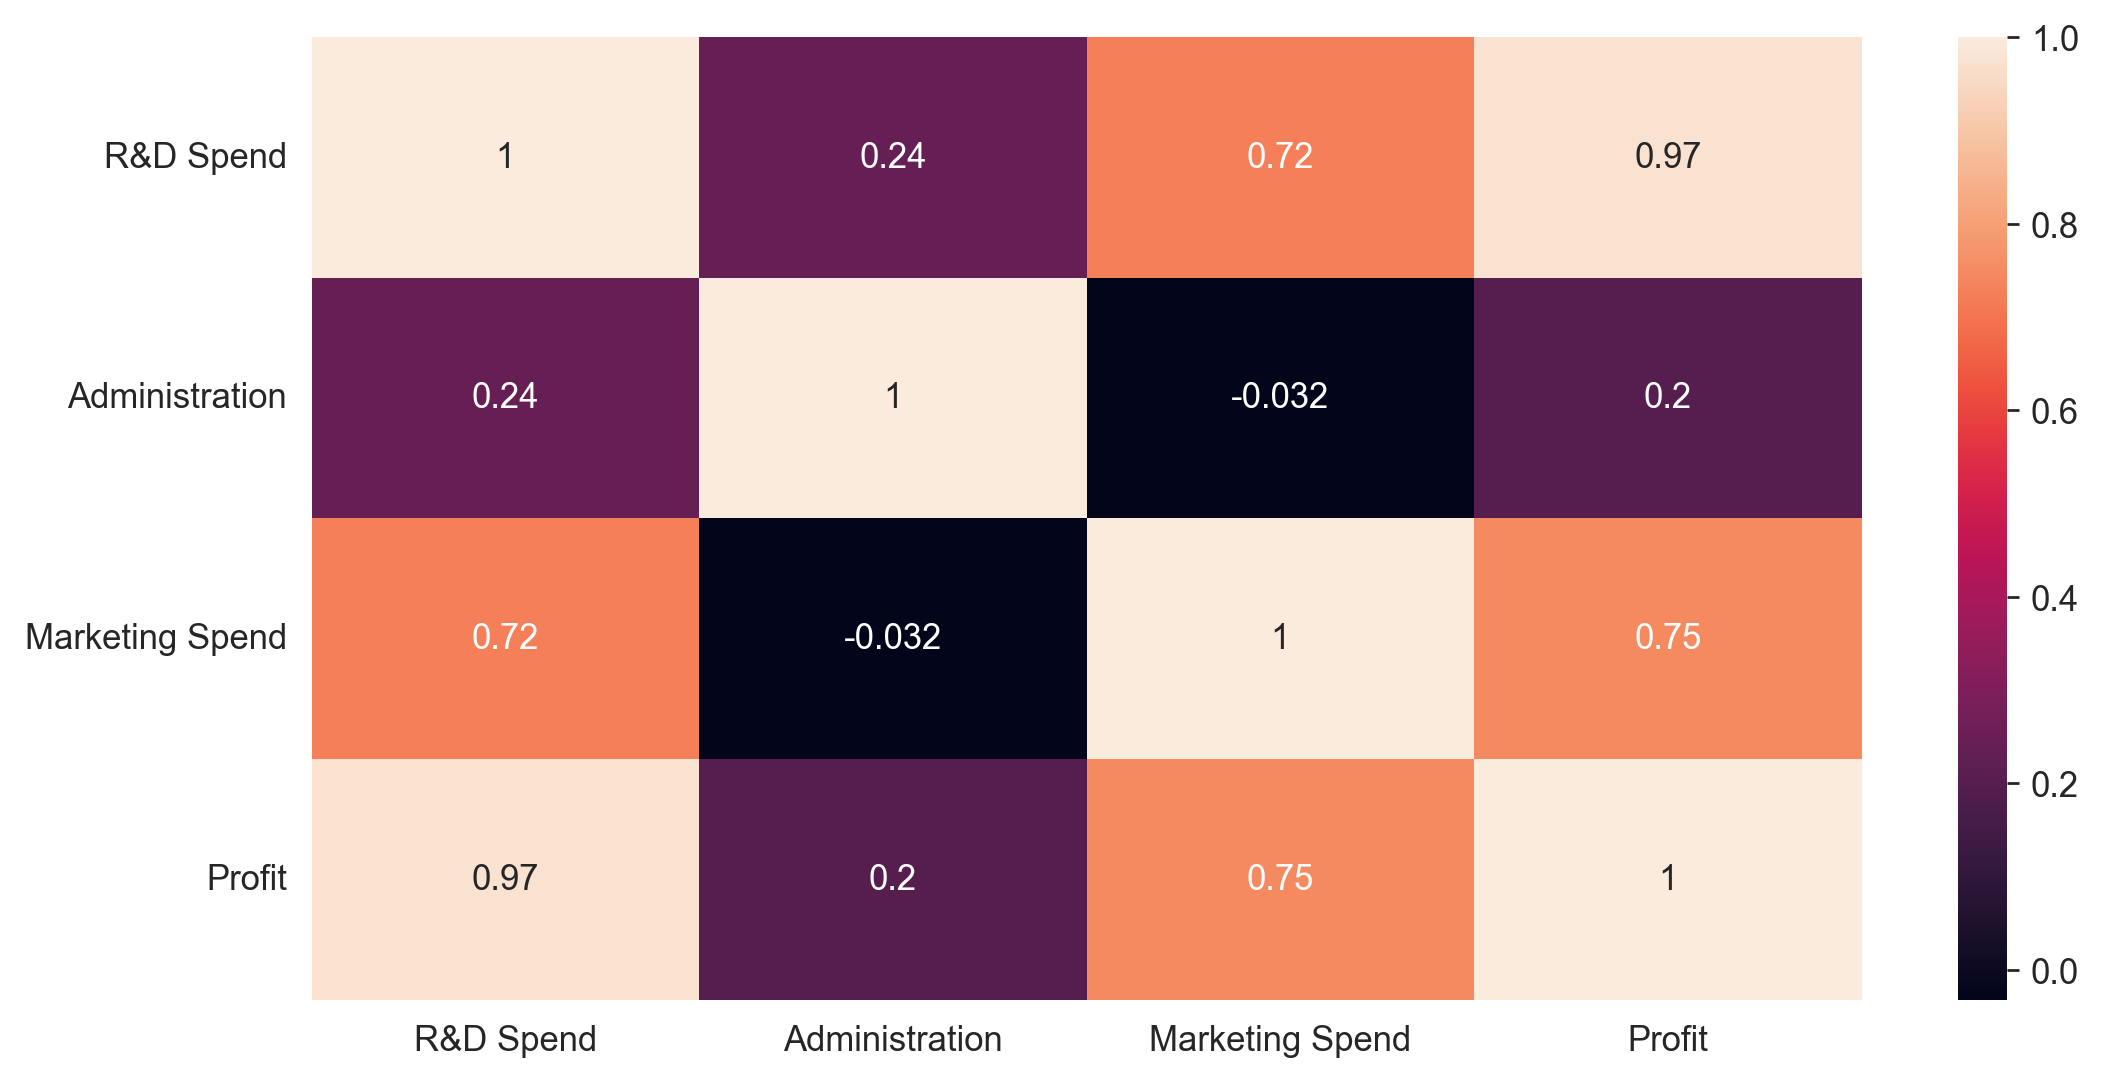

In [35]:
# Select only numeric columns in the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Plot the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True)

<Axes: >

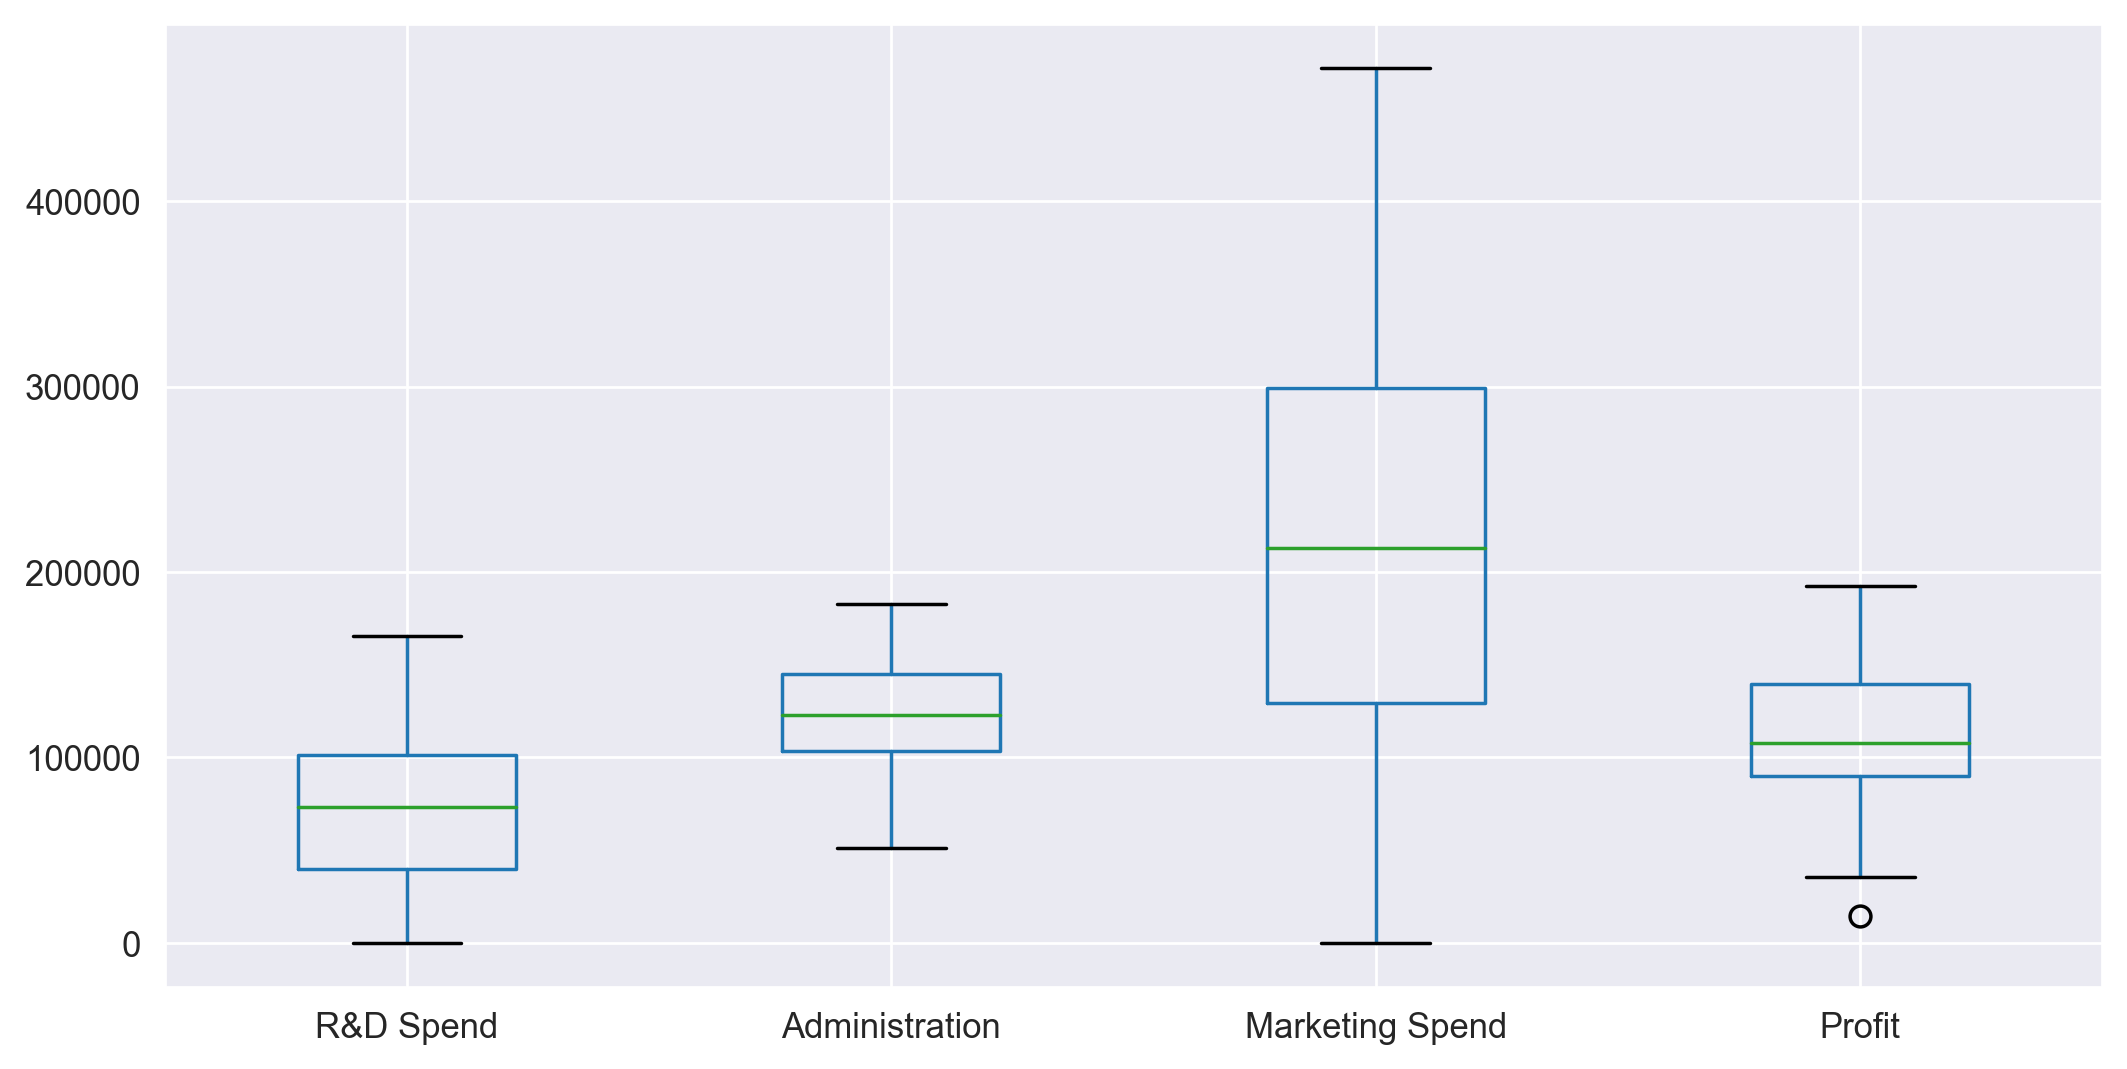

In [7]:
df.boxplot()

# Model Building

In [15]:
df = df.drop('State', axis=1)

In [16]:
df

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [ ]:
#Now, we can prepare the data for the linear regression model

In [17]:
# create a new simple dataframe using the existing one
new_df = df[['R&D Spend', 'Profit']]
new_df

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94
5,131876.90,156991.12
6,134615.46,156122.51
7,130298.13,155752.60
8,120542.52,152211.77
9,123334.88,149759.96


<Axes: xlabel='R&D Spend', ylabel='Profit'>

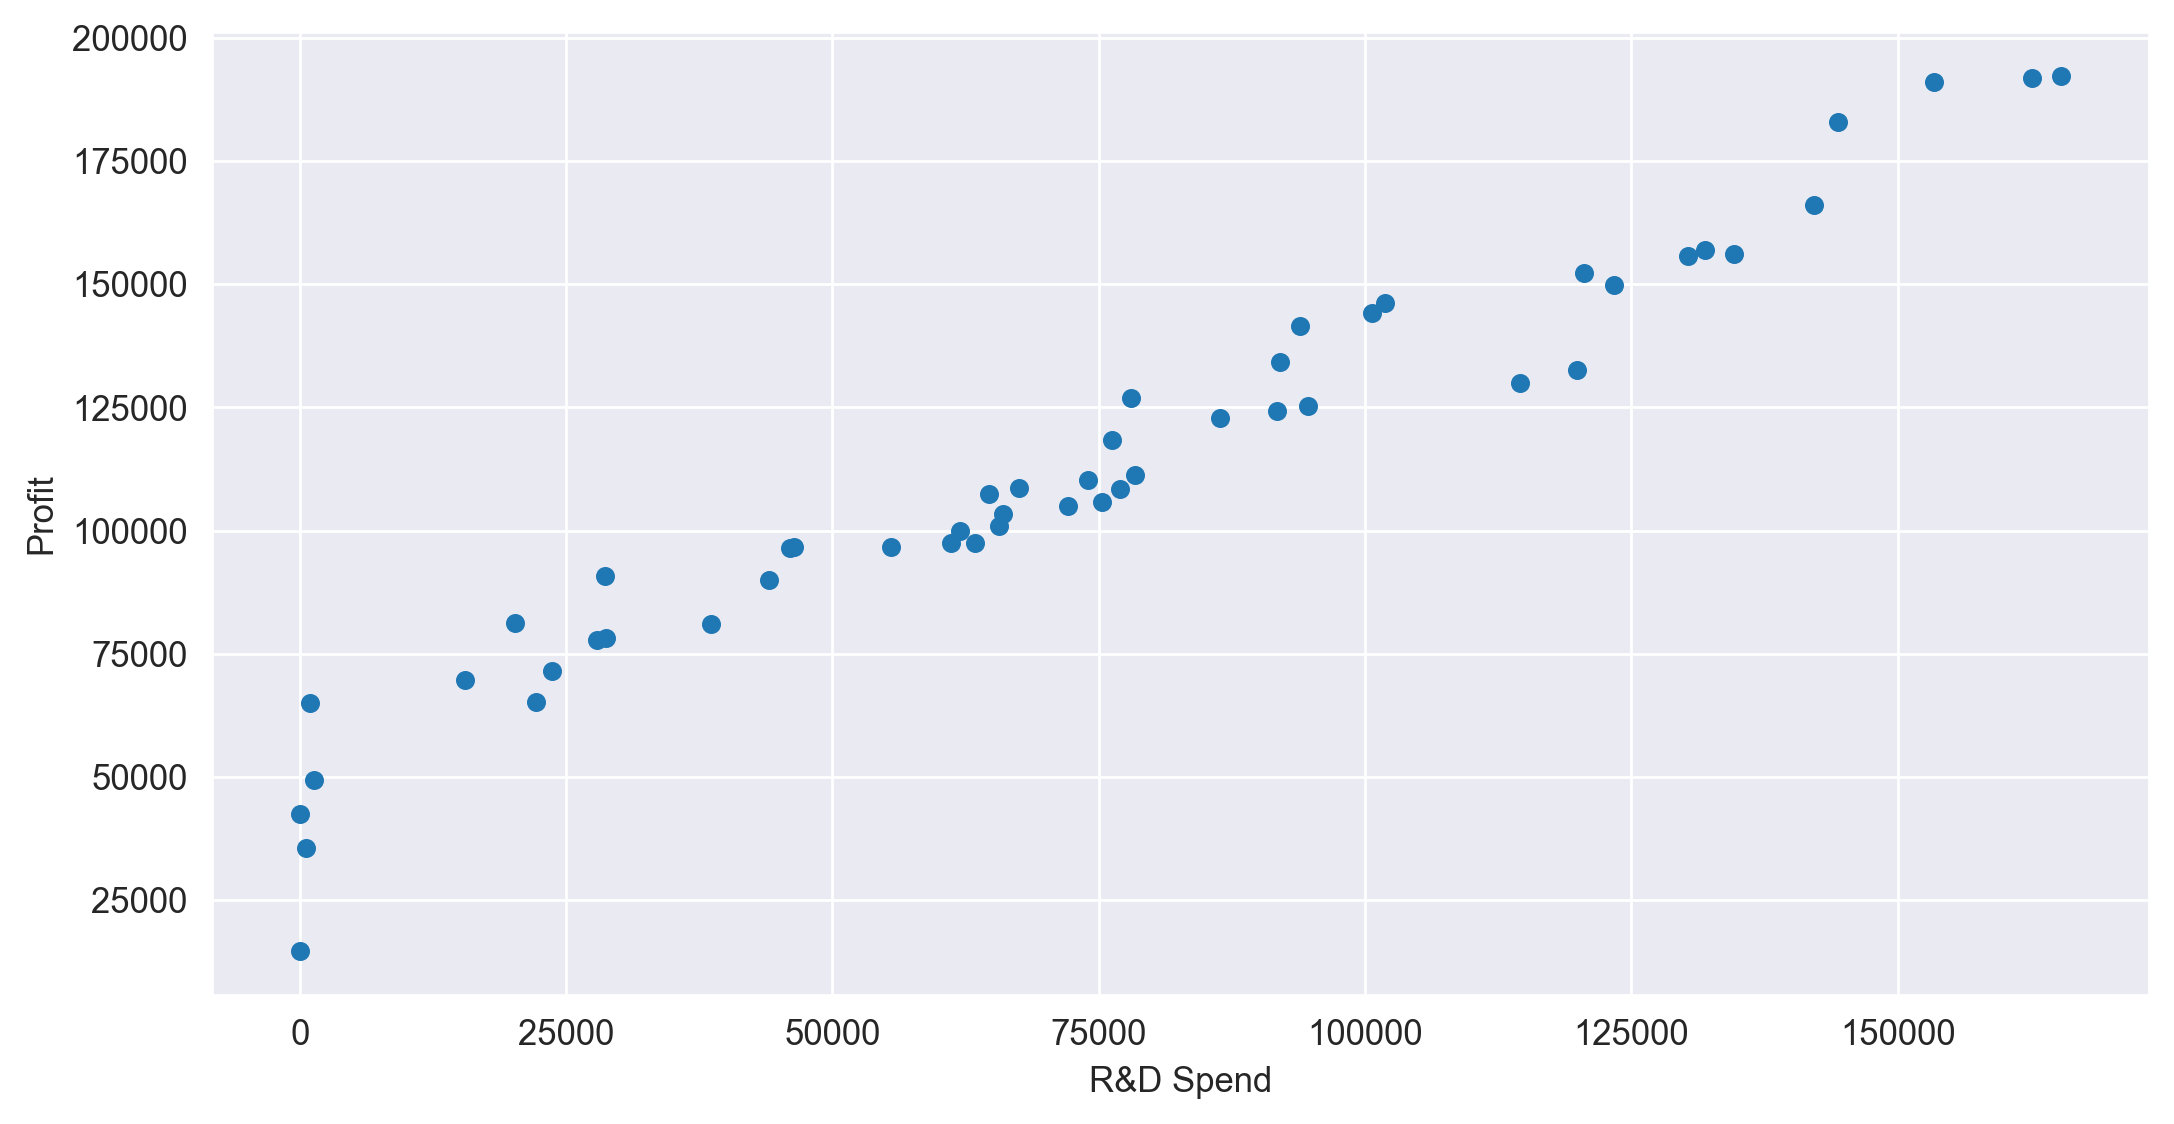

In [18]:
# check the distribution of data by plotting as scatter
new_df.plot(x='R&D Spend', y='Profit', kind='scatter')	

In [19]:
# define x and y by using the new dataframe
x = new_df['R&D Spend']
y = new_df['Profit']

In [20]:
# import ML related packages of sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [21]:
# split the data as train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [22]:
#shapes of splitted data - sizes of the X_train and Y_train should be same. Also, tests.
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (40,)
X_test: (10,)
Y_train: (40,)
Y_test: (10,)


In [23]:
# create a linear regression model
model = LinearRegression()

In [24]:
# train the model using training data
# since we have only one independent variable, you should use 'values.reshape(-1,1)'. Otherwise, x_train is enough.
model.fit(x_train.values.reshape(-1,1), y_train)  

LinearRegression()

In [25]:
# print coefficient
model.coef_

array([0.8516228])

In [26]:
# print y_intercept | bias
model.intercept_

48416.297661385026

In [27]:
# make predictions using test data
y_pred = model.predict(x_test.values.reshape(-1,1))

In [28]:
# let's calculate the metrics
# MSE
mse = mean_squared_error(y_test, y_pred)
print("MSE --> ", mse)

MSE -->  68473440.71905932


In [29]:
# RMSE
import math
rmse = math.sqrt(mse)
print("RMSE --> ", rmse)

RMSE -->  8274.86801822599


In [30]:
# MAE
mae = mean_absolute_error(y_test, y_pred)
print("MAE --> ", mae)

MAE -->  6772.453280477899


In [31]:
# R2
r2 = r2_score(y_test, y_pred)
print("R2 --> ", r2)

R2 -->  0.9464587607787219


In [112]:
# Calculate Adjusted R-squared
n = len(y)
k = len('R&D Spend') - 1  # Subtract 1 to account for the constant term
adjusted_r2 = 1 - (1 -0.9464587607787219) * (n - 1) / (n - k - 1)

print("R-squared:",0.9464587607787219)
print("Adjusted R-squared:", adjusted_r2)

R-squared: 0.9464587607787219
Adjusted R-squared: 0.9360116897111554


In [32]:
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)

MSE -->  68473440.71905932
RMSE -->  8274.86801822599
MAE -->  6772.453280477899
R2 -->  0.9464587607787219


<Axes: xlabel='R&D Spend', ylabel='Profit'>

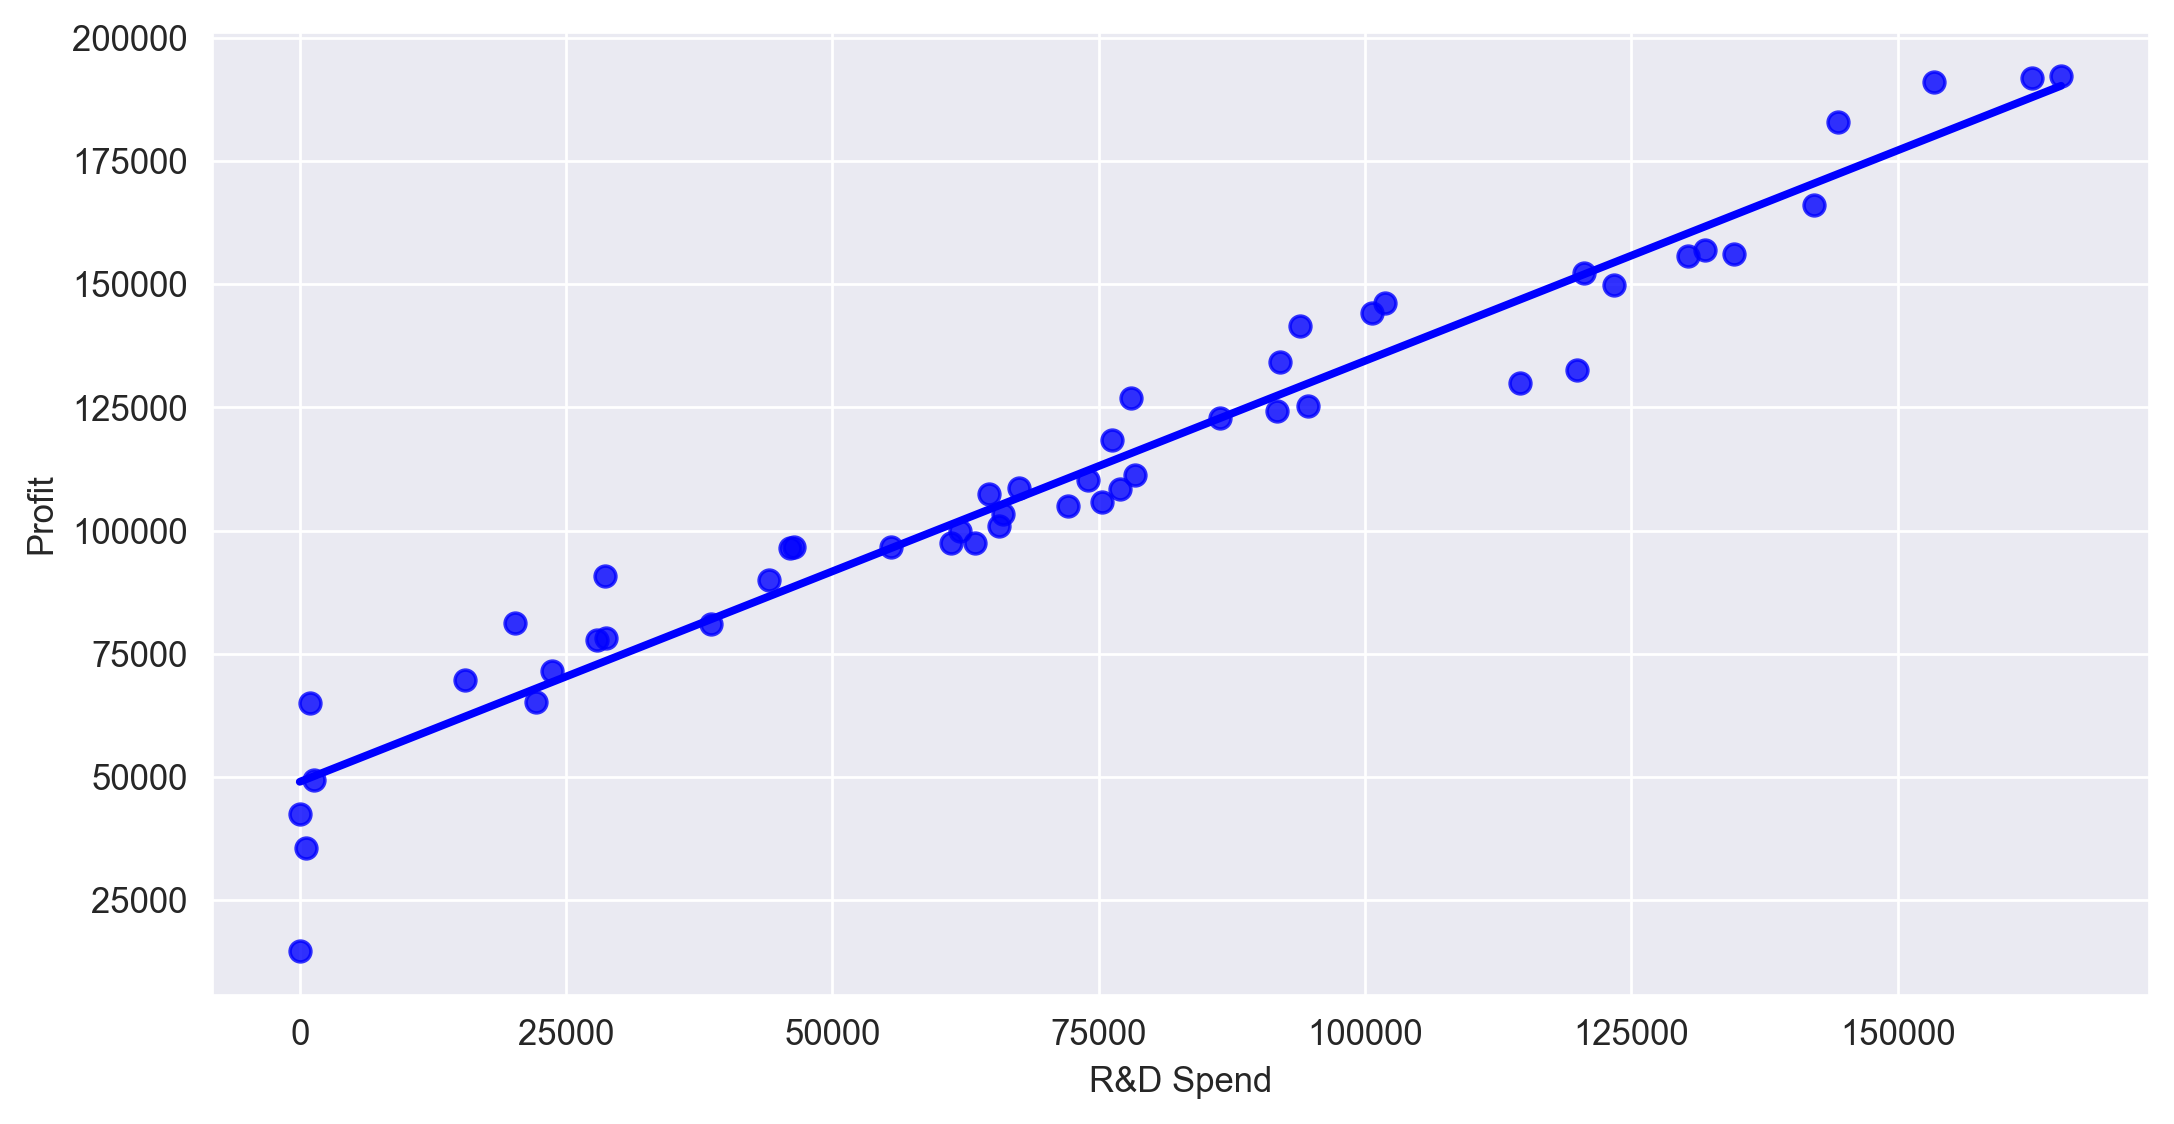

In [33]:
# plot regression model line
sns.regplot(x=x, y=y, ci=None, color ='blue')

In [34]:
pred_y_df = pd.DataFrame({'actual value': y_test, 'predicted values': y_pred, 'difference': y_test - y_pred})
pred_y_df.head(20)

,actual value,predicted values,difference
28,103282.38,104667.278060,-1384.898060
11,144259.40,134150.834106,10108.565894
10,146121.95,135207.800195,10914.149805
41,77798.83,72170.544289,5628.285711
2,191050.39,179090.586025,11959.803975
27,105008.31,109824.773866,-4816.463866
38,81229.06,65644.277738,15584.782262
31,97483.56,100481.432771,-2997.872771
22,110352.25,111431.752024,-1079.502024
4,166187.94,169438.148435,-3250.208435


Text(0, 0.5, 'Predicted')

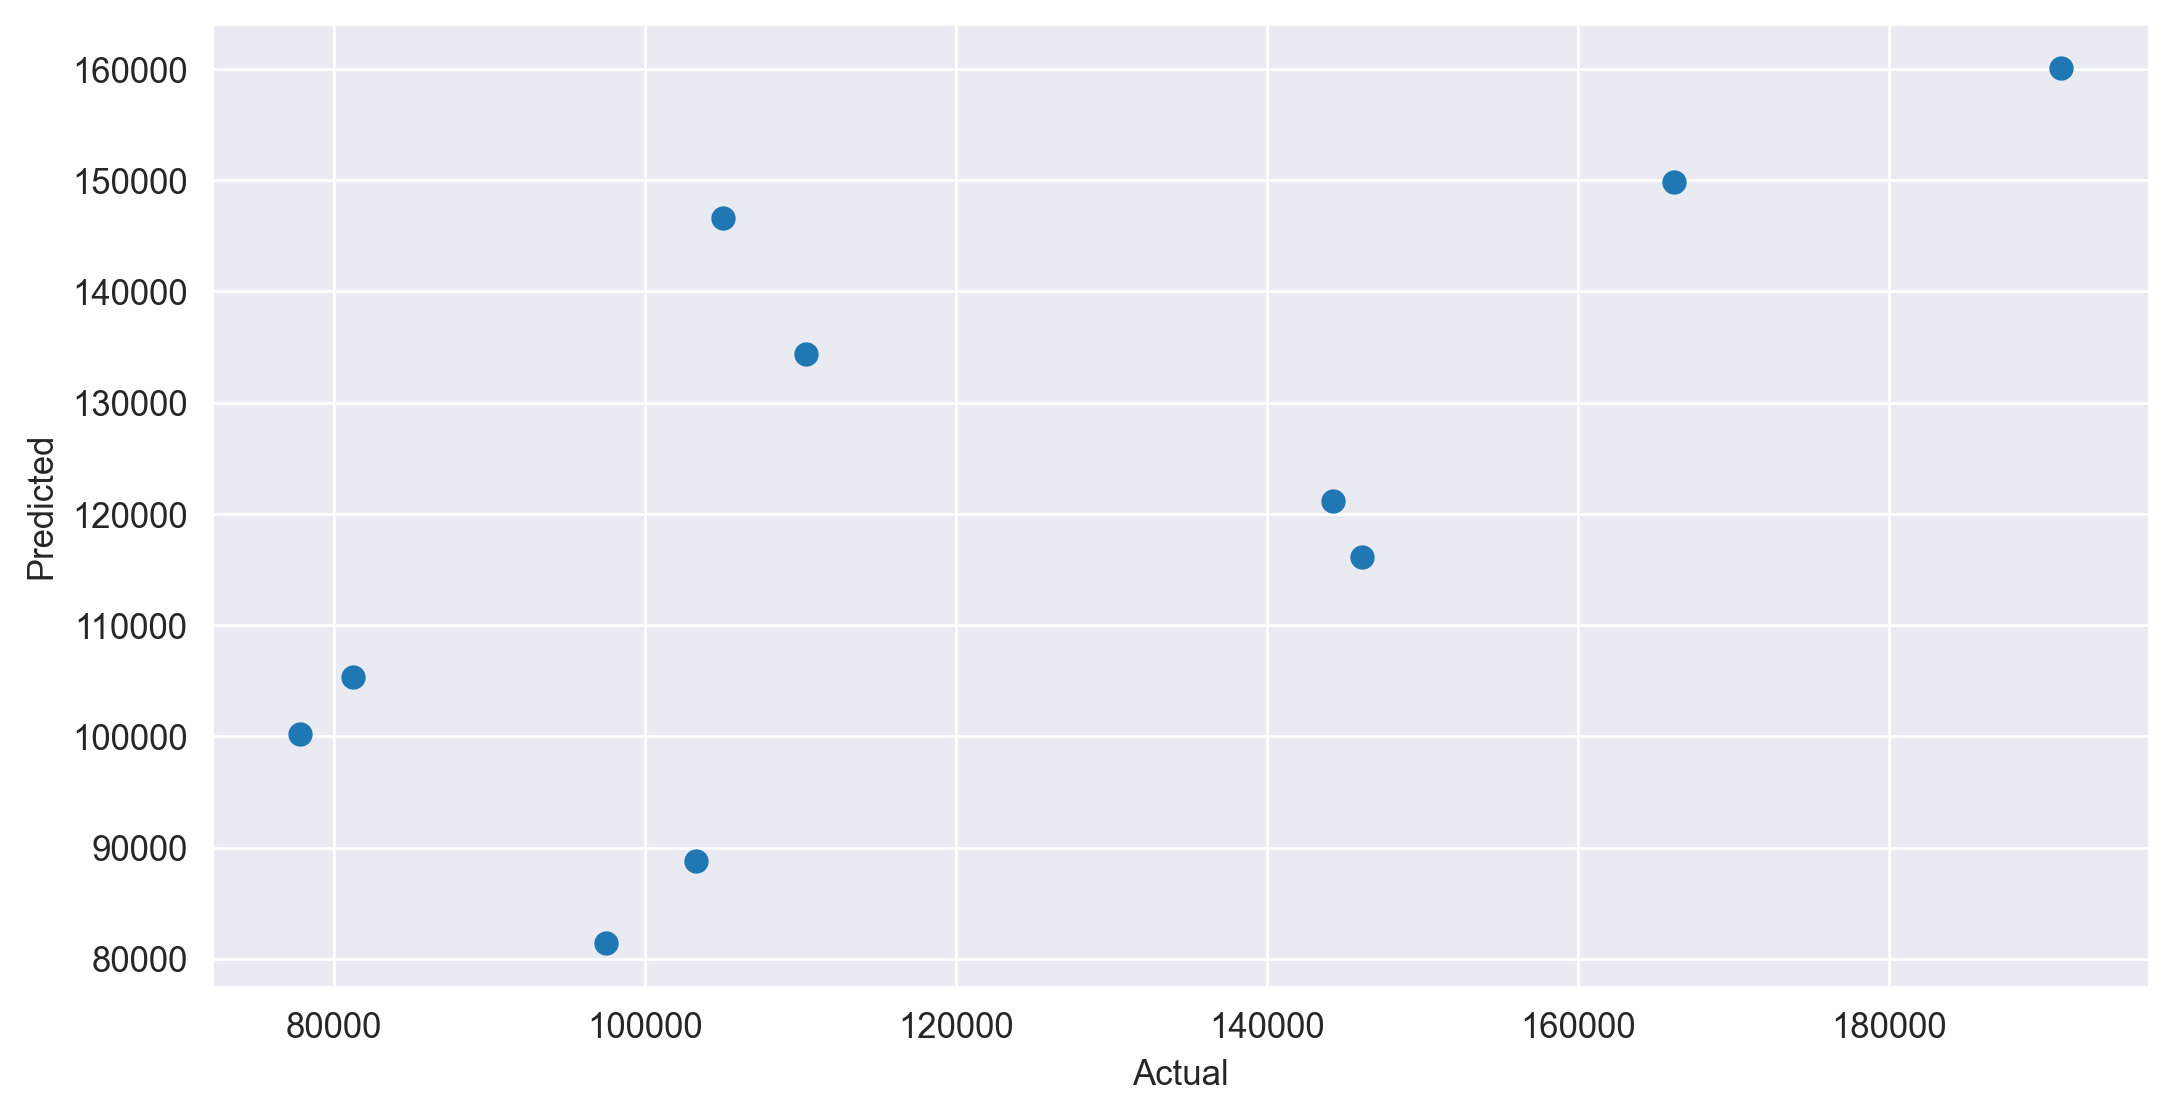

In [54]:
# plot actual and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Q-Q PLOT 

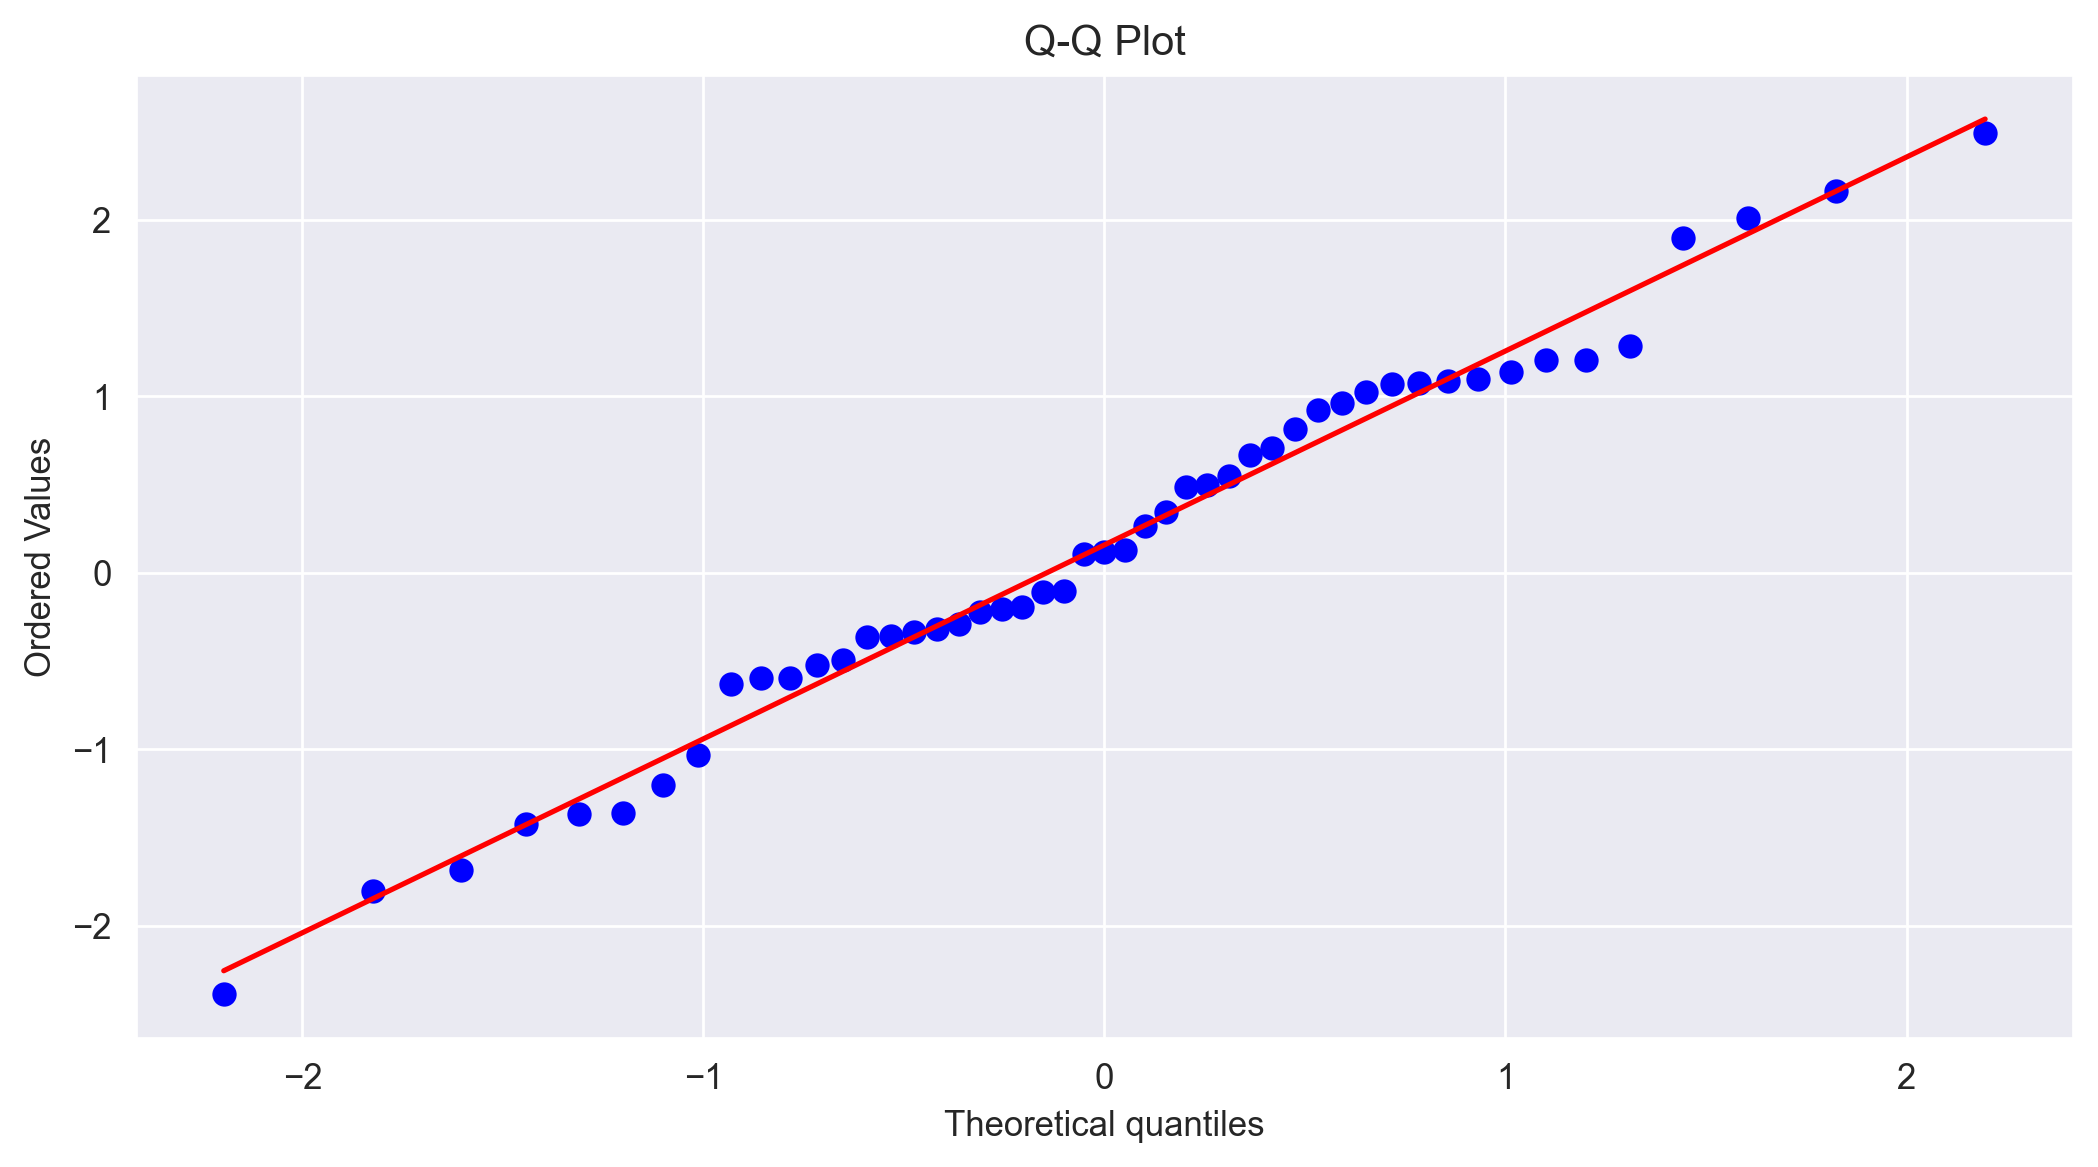

In [110]:
from scipy.stats import probplot

# Generate some random data
data = np.random.normal(size=49)

# Create a Q-Q plot
probplot(data, plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Calculate VIF

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [73]:
data = df.drop(columns=['Profit'])
data

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [74]:
type(data)

pandas.core.frame.DataFrame

In [75]:
data.values

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [76]:
vif = pd.DataFrame()
vif

""


In [77]:
vif['Features'] = data.columns
vif

,Features
0,R&D Spend
1,Administration
2,Marketing Spend


In [78]:
range(len(data.columns))

range(0, 3)

In [79]:
[variance_inflation_factor(data.values,i) for i in range(0,3)]

[8.384570754559961, 4.0264055178945535, 7.593983592680924]

In [83]:
vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(0,3)]
vif

,Features,VIF
0,R&D Spend,8.384571
1,Administration,4.026406
2,Marketing Spend,7.593984
